Tutorial 25 - Astropy

Name: Judit Bergfalk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 think+code: using astropy for calculations

In [2]:
import astropy.constants as co
import astropy.units as u

In [3]:
energy = -0.5 * co.m_e * co.c**2 * co.alpha**2
print(energy)

-2.1798723255058596e-18 kg m2 / s2


In [4]:
energy.to(u.eV)

<Quantity -13.60569301 eV>

In [5]:
from astropy.coordinates import get_body
from astropy.time import Time
nep = get_body('neptune',Time.now())
print(nep)

<SkyCoord (GCRS: obstime=2020-07-31 18:32:10.626597, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (351.51723099, -4.85474132, 29.16353738)>


In [6]:
time = nep.distance / co.c
print(time)

9.727908960378547e-08 AU s / m


In [7]:
print(time.to(u.min))

242.5457444726802 min


In [8]:
print(8.3*u.min*nep.distance.value)

242.05736028986507 min


In [9]:
print('This Quantity has value {} and {} units.'.\
     format(nep.distance.value, nep.distance.unit))

This Quantity has value 29.163537384321092 and AU units.


## 2 think+pair+code: how old is the Universe?

In [10]:
H0 = 70 * u.km / u.second / u.Mpc    # Hubble constant
age = 1 / H0                         # age of the Universe
age = age.decompose()

ageOfTheUniverse = age.to(u.Gyr)
print(ageOfTheUniverse)

13.96846030961612 Gyr


Yes, 14 billions years make sense for the age of the Universe.

## 3 think+code: high-redshift galaxies

In [11]:
import astropy.io.fits
hdus = astropy.io.fits.open('HubbleXDF.fits')

In [12]:
hdus.info()

Filename: HubbleXDF.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  F435W         1 ImageHDU        36   (5250, 5250)   float32   
  2  F775W         1 ImageHDU        36   (5250, 5250)   float32   


In [13]:
# Pull image arrays
F435 = hdus['F435W'].data
F775 = hdus['F775W'].data

In [14]:
# Read distant galaxy file for overlay
import astropy.io.ascii
distantgalaxies = astropy.io.ascii.read('XDF_idropouts.txt')
ra = distantgalaxies['RA']
dec = distantgalaxies['DEC']

# Convert world coordinate system to pixels
from astropy import wcs
wcs775 = wcs.WCS(hdus['F775W'].header)
xgal, ygal = wcs775.wcs_world2pix(ra, dec, 0)

Text(0.5, 1.0, 'Red')

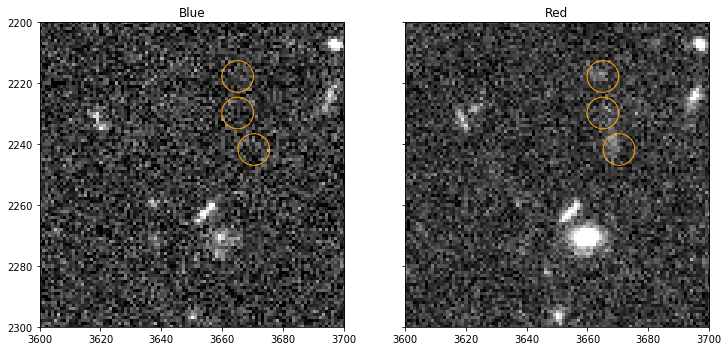

In [15]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12,6))

# Set up plot parameters
plt.xlim(3600,3700); plt.ylim(2300,2200)
n, x = np.percentile(F775.flatten(), [1, 99])
imargs = dict(vmin=n, vmax=x, cmap='gray')
sargs = dict(facecolor='none', edgecolor='orange', s=1000)

# Blue
plt.sca(axes[0])
plt.imshow(F435, **imargs)
plt.scatter(xgal, ygal, **sargs)
plt.title('Blue')

# Red
plt.sca(axes[1])
plt.imshow(F775, **imargs)
plt.scatter(xgal, ygal, **sargs)
plt.title('Red')

## 4 think+pair+code: your own calculation

In [16]:
massSun = 1 * u.solMass
massEarth = 1 * u.earthMass
G = co.G
radiusEarth = 1 * u.AU

Force = G * massSun * massEarth / radiusEarth**2

Force = Force.decompose()
Force = Force.to(u.Newton)
print(Force)

3.5416621652259388e+22 N
